[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/benmsanderson/tutorial.git/HEAD?labpath=FAIR_nuclear.ipynb)


In [2]:
%matplotlib inline

In [3]:
!pip install fair
import fair

     |████████████████████████████████| 3.4 MB 5.8 MB/s eta 0:00:01


In [4]:
import numpy as np
from scipy import stats
from fair.tools.ensemble import tcrecs_generate

from matplotlib import pyplot as plt
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (16, 9)

In [5]:
from fair.RCPs import rcp3pd, rcp45, rcp6, rcp85
from fair.SSPs import ssp370, ssp126, ssp585, ssp119

# Let's start with some standard simulations

(1850.0, 2100.0)

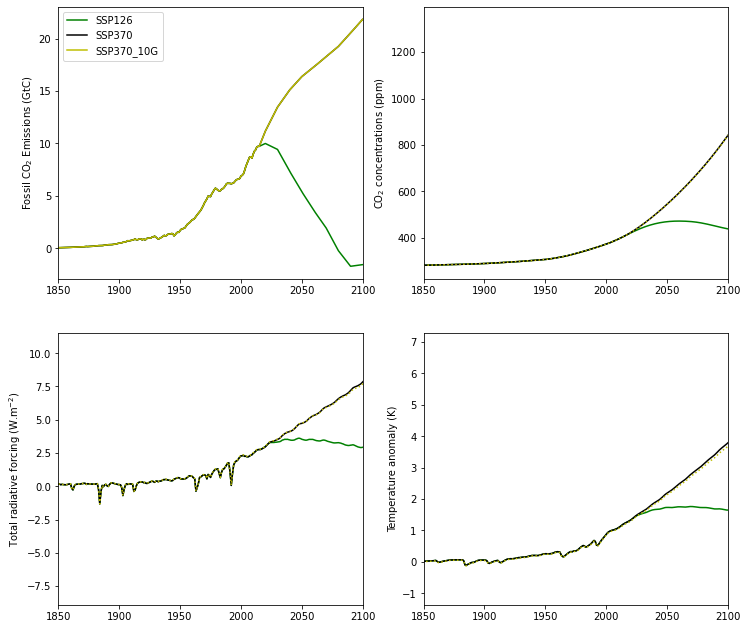

In [7]:

fig = plt.figure(figsize=(12, 11))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
#conventional SSP-RCPs
C26, F26, T26 = fair.forward.fair_scm(emissions=ssp126.Emissions.emissions)
ax1.plot(rcp3pd.Emissions.year, ssp126.Emissions.co2_fossil, color='green', label='SSP126')
ax2.plot(rcp3pd.Emissions.year, C26[:, 0], color='green')
ax3.plot(rcp3pd.Emissions.year, np.sum(F26, axis=1), color='green')
ax4.plot(rcp3pd.Emissions.year, T26, color='green')

C37, F37, T37 = fair.forward.fair_scm(emissions=ssp370.Emissions.emissions)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='black', label='SSP370')
ax2.plot(rcp3pd.Emissions.year, C37[:, 0], color='black')
ax3.plot(rcp3pd.Emissions.year, np.sum(F37, axis=1), color='black')
ax4.plot(rcp3pd.Emissions.year, T37, color='black')

C37g0, F37g0, T37g0 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='y', label='SSP370_10G')
ax2.plot(rcp3pd.Emissions.year, C37g0, color='y',linestyle=':')
ax3.plot(rcp3pd.Emissions.year, F37g0, color='y',linestyle=':')
ax4.plot(rcp3pd.Emissions.year, T37g0, color='y',linestyle=':')



ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');
ax1.set_xlim(1850,2100)
ax2.set_xlim(1850,2100)
ax3.set_xlim(1850,2100)
ax4.set_xlim(1850,2100)



For the nuclear simulations, let's define a decaying radiative pulse

In [8]:
#function to simulate nuclear pulse given initial forcing level and decay time
def nfn(a,t):
  ans=ssp370.Emissions.emissions[:,1]*0
  ans[257:307]=-a*np.exp(-np.arange(1,51,1)/t)
  return ans

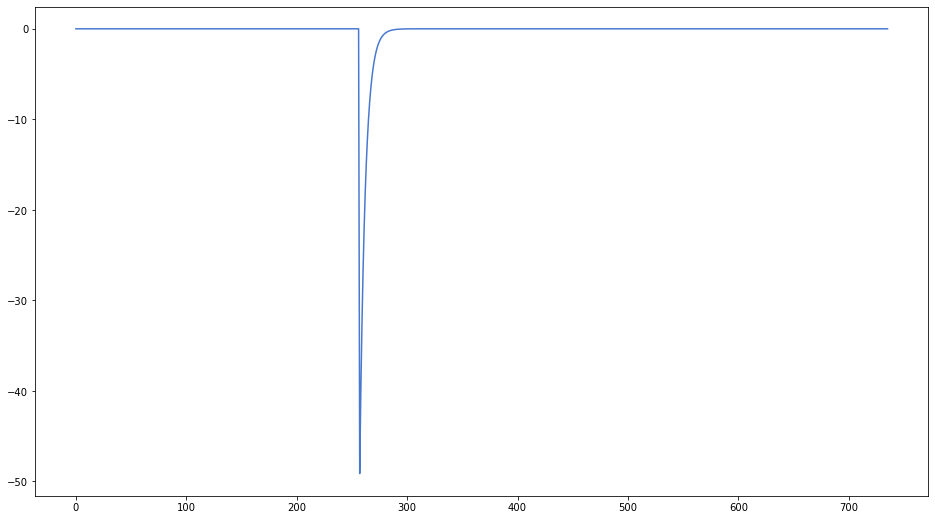

In [9]:
plt.plot(nfn(60,5))

/home/sanderson/anaconda3/lib/python3.9/site-packages/fair/gas_cycle/fair1.py:66: RuntimeWarning: overflow encountered in exp
  iirf_arr = alp_b*(np.sum(a*tau*(1.0 - np.exp(-iirf_h/(tau*alp_b)))))
/home/sanderson/anaconda3/lib/python3.9/site-packages/fair/gas_cycle/fair1.py:66: RuntimeWarning: overflow encountered in exp
  iirf_arr = alp_b*(np.sum(a*tau*(1.0 - np.exp(-iirf_h/(tau*alp_b)))))


(1850.0, 2100.0)

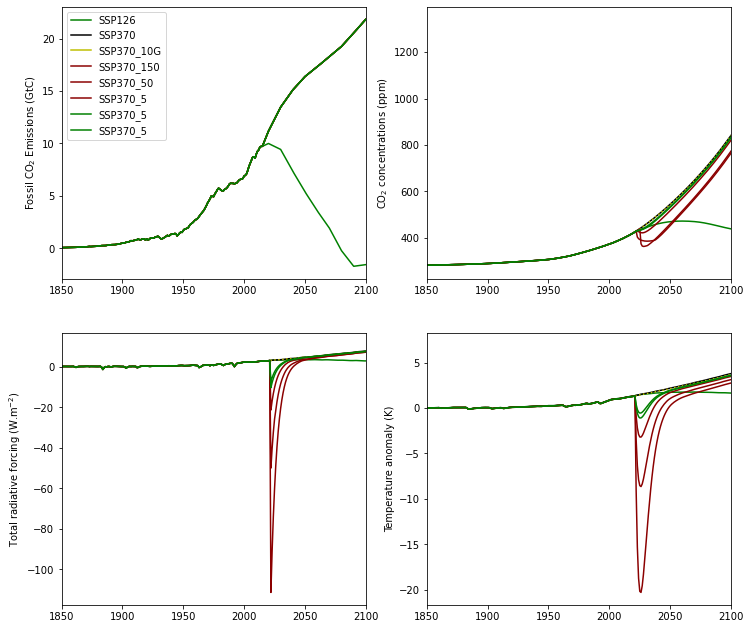

In [10]:

fig = plt.figure(figsize=(12, 11))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
#conventional SSP-RCPs
C26, F26, T26 = fair.forward.fair_scm(emissions=ssp126.Emissions.emissions)
ax1.plot(rcp3pd.Emissions.year, ssp126.Emissions.co2_fossil, color='green', label='SSP126')
ax2.plot(rcp3pd.Emissions.year, C26[:, 0], color='green')
ax3.plot(rcp3pd.Emissions.year, np.sum(F26, axis=1), color='green')
ax4.plot(rcp3pd.Emissions.year, T26, color='green')

C37, F37, T37 = fair.forward.fair_scm(emissions=ssp370.Emissions.emissions)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='black', label='SSP370')
ax2.plot(rcp3pd.Emissions.year, C37[:, 0], color='black')
ax3.plot(rcp3pd.Emissions.year, np.sum(F37, axis=1), color='black')
ax4.plot(rcp3pd.Emissions.year, T37, color='black')

C37g0, F37g0, T37g0 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='y', label='SSP370_10G')
ax2.plot(rcp3pd.Emissions.year, C37g0, color='y',linestyle=':')
ax3.plot(rcp3pd.Emissions.year, F37g0, color='y',linestyle=':')
ax4.plot(rcp3pd.Emissions.year, T37g0, color='y',linestyle=':')

#for the nuclear simulations, we run with Mutligas off.  nonco2 radiative forcing from the baseline case is used, in addition to the nuclear pulse in the other_rf term
#the following forcings were munually adjusted to 65 and 30Wm^-2 to match the 2 and 8k cooling seen in Robock 2007

C37g150, F37g150, T37g150 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(65,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='darkred', label='SSP370_150')
ax2.plot(rcp3pd.Emissions.year, C37g150, color='darkred')
ax3.plot(rcp3pd.Emissions.year, F37g150, color='darkred')
ax4.plot(rcp3pd.Emissions.year, T37g150, color='darkred')


C37g50, F37g50, T37g50 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(30,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='darkred', label='SSP370_50')
ax2.plot(rcp3pd.Emissions.year, C37g50, color='darkred')
ax3.plot(rcp3pd.Emissions.year, F37g50, color='darkred')
ax4.plot(rcp3pd.Emissions.year, T37g50, color='darkred')

#this is the response to 140Wm^-2 - the 90th percentile of the distribution calculated below
C37g300, F37g300, T37g300 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(140,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='darkred', label='SSP370_5')
ax2.plot(rcp3pd.Emissions.year, C37g300, color='darkred')
ax3.plot(rcp3pd.Emissions.year, F37g300, color='darkred')
ax4.plot(rcp3pd.Emissions.year, T37g300, color='darkred')

#this is for the smaller event
C37g5, F37g5, T37g5 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(13,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='g', label='SSP370_5')
ax2.plot(rcp3pd.Emissions.year, C37g5, color='green')
ax3.plot(rcp3pd.Emissions.year, F37g5, color='g')
ax4.plot(rcp3pd.Emissions.year, T37g5, color='g')

#this is for the smaller event
C37g6, F37g6, T37g6 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(16.5,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='g', label='SSP370_5')
ax2.plot(rcp3pd.Emissions.year, C37g6, color='green')
ax3.plot(rcp3pd.Emissions.year, F37g6, color='g')
ax4.plot(rcp3pd.Emissions.year, T37g6, color='g')




ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');
ax1.set_xlim(1850,2100)
ax2.set_xlim(1850,2100)
ax3.set_xlim(1850,2100)
ax4.set_xlim(1850,2100)

